## Homework10-0402
   **截止日期：**<font color=ff0000>**4.9(周六)晚** </font>
   <br><br>**注：**本次作业中附加题最高加分不超过1分。

## 1 NetworkX基础（10分）
- hvPlot提供了NetworkX绘制的API，感兴趣的同学可以在接下来的题目里面使用（当然也可以直接使用nx.draw()），具体可参见https://hvplot.holoviz.org/user_guide/NetworkX.html#networkx
- 若你无法正常运行nx.draw()，可尝试在本地.py文件中debug并将代码复制于此。
- 可参考NetworkX官方文档https://networkx.org/documentation/stable/tutorial.html

### 1.1 根据下图创建有向图并绘制（2分）
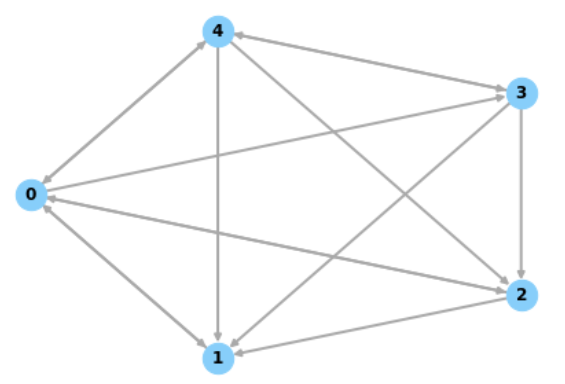

In [1]:
import networkx as nx
#TODO
G = nx.DiGraph()
elist = [(0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (2, 0), (2, 1), (3, 1), (3, 2), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3)]
G.add_edges_from(elist)

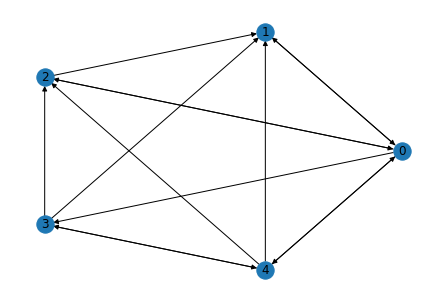

In [2]:
nx.draw(G, nx.circular_layout(G), with_labels=True)

### 1.2 添加删除操作（2分）
<br>(1)添加节点5，并添加边4->5,5->0,5->4
<br>(2)删除边4->1(可使用nx.remove_edge(u,v))
<br> 绘制得到的新网络

In [3]:
#TODO
G.add_node(5)
G.add_edges_from([(4, 5), (5, 0), (5, 4)])
G.remove_edge(4, 1)

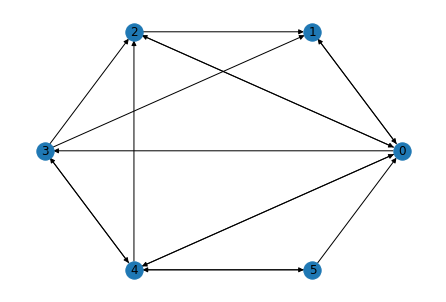

In [4]:
nx.draw(G, nx.circular_layout(G), with_labels=True)

### 1.3 节点属性与边属性（2分）
<br>(1)为每个节点添加属性score，分别为0,1,2,3,4,5（可通过G.nodes[0]得到节点0所对应的属性词典）
<br>(2)为边添加属性weight,其值为两个端点的score的平均（可通过G[u][v]得到边(u,v)对应的属性词典）
<br>(3)输出此时网络中节点的信息（不需要与参考答案完全相同）

In [5]:
#TODO
for i in range(6):
    G.nodes[i]['score'] = i
for i in range(6):
    for j in range(6):
        if i != j and G.has_edge(i, j):
            G[i][j]['weight'] = (G.nodes[i]['score']+G.nodes[j]['score'])/2

In [6]:
for i in G.nodes():
    print("Node:", i, " Attr:", G.nodes[i])
    print("Edges:")
    for j in G.nodes():
        if i != j and G.has_edge(i, j):
            print(j, ':', G[i][j])

Node: 0  Attr: {'score': 0}
Edges:
1 : {'weight': 0.5}
2 : {'weight': 1.0}
3 : {'weight': 1.5}
4 : {'weight': 2.0}
Node: 1  Attr: {'score': 1}
Edges:
0 : {'weight': 0.5}
Node: 2  Attr: {'score': 2}
Edges:
0 : {'weight': 1.0}
1 : {'weight': 1.5}
Node: 3  Attr: {'score': 3}
Edges:
1 : {'weight': 2.0}
2 : {'weight': 2.5}
4 : {'weight': 3.5}
Node: 4  Attr: {'score': 4}
Edges:
0 : {'weight': 2.0}
2 : {'weight': 3.0}
3 : {'weight': 3.5}
5 : {'weight': 4.5}
Node: 5  Attr: {'score': 5}
Edges:
0 : {'weight': 2.5}
4 : {'weight': 4.5}


### 1.4 点度中心度计算（2分）
计算该网络中每个节点的点度中心度，并为每个节点添加属性centrality记录点度中心度。

In [7]:
#TODO
centrality = nx.in_degree_centrality(G)
for i in G.nodes():
    G.nodes[i]['centrality'] = round(centrality[i], 1)

In [8]:
for i in G.nodes():
    print("Node:", i, " Attr:", G.nodes[i])

Node: 0  Attr: {'score': 0, 'centrality': 0.8}
Node: 1  Attr: {'score': 1, 'centrality': 0.6}
Node: 2  Attr: {'score': 2, 'centrality': 0.6}
Node: 3  Attr: {'score': 3, 'centrality': 0.4}
Node: 4  Attr: {'score': 4, 'centrality': 0.6}
Node: 5  Attr: {'score': 5, 'centrality': 0.2}


### 1.5 绘制图像（2分+0.5分）
用你认为合理且美观的方式绘制该网络：
<br>(1)基础要求：可修改节点颜色、大小、形状，边的颜色、粗细等(2分)
<br>(2)(附加题0.5分，若完成优秀可加1分)
<br>&emsp;可选方案1：根据每个节点centrality或每条边weight的大小，绘制不同样式的节点或边；
<br>&emsp;可选方案2：合理排布节点位置；
<br>&emsp;其他你能想到的方案

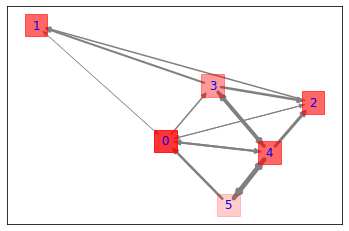

In [46]:
#TODO
#nx.draw(G, nx.spring_layout(G), node_color='red', node_size=500, node_shape='s', with_labels='True', edge_color='gray')
pos = nx.spring_layout(G)
widthlist = [G[e[0]][e[1]]['weight'] for e in G.edges()]
nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), alpha=list(centrality.values()),
    node_size=500, node_shape='s', node_color='r')
nx.draw_networkx_labels(G, pos, font_color='b')
nx.draw_networkx_edges(G, pos, G.edges(), width=widthlist, edge_color='gray')

## 2 附加题
本次附加题最多加1分
### 朋友悖论（1分）
朋友悖论最早是由社会学家斯科特·L·菲尔德（Scott L. Feld）于1991年首次观察到的一种现象，即平均而言你的朋友比你拥有更多的朋友。这个悖论实际上表明了中心度的重要性：你更容易认识拥有更多朋友的人。下面我们考虑一个极端的例子来模拟这个悖论。
<br>(1)读取friends.csv，将文件中的朋友关系以网络的方式建模。
<br>(2)统计每个人朋友的数量，以及朋友的平均朋友数，作为节点属性添加。
<br>(3)统计满足朋友悖论的人的百分比。
<br>(4)以不同颜色绘制满足/不满足朋友悖论的节点。

In [ ]:
#TODO

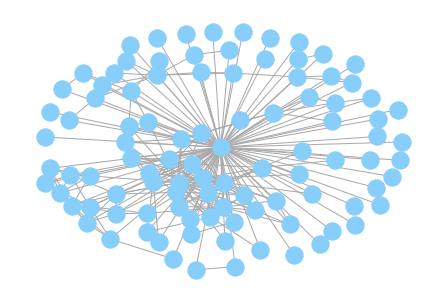

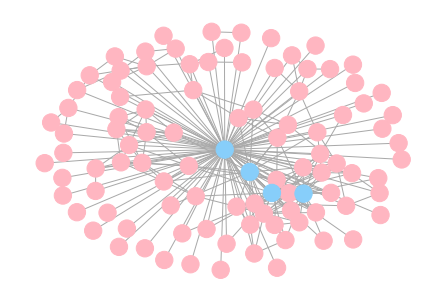

### Unpopular Norms(1分)
在非完全的社交网络中，由于中心度较高的节点对周围节点的影响，可能会使一些小众爱好逐渐演变为大众爱好，或是形成不受欢迎的规范，可参考https://www.jasss.org/20/3/5.html
<br>下面我们以一个很简单的例子来模拟这种现象。
<br>(1)将给定的朋友关系建模成无向图。
<br>(2)为网络中的节点加上给定的标签与朋友数量。
<br>(3)绘制网络，不同标签采用不同颜色（可选：不同朋友数量采用不同大小）
<br>(4)用以下规则更新网络：一个人的标签由其朋友的标签加权决定，权重为朋友数量。
<br>(5)重复(3)-(4)直到网络不再变化。

In [156]:
import numpy as np
edges=[
    [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0]]
labels=[0,1,0,1,0,0,0,0,1,0,0,1]
#TODO
